## Import libraries and load data

In [69]:
# Libraries to work with the data object
import pandas as pd 
import numpy as np

# libraries to visualize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

import graphviz
import pydotplus

# sklearn packages for Decision Tree
from sklearn import metrics
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
from sklearn.metrics import roc_auc_score

# sklearn packages for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Sampling libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


#load our data
original_df = pd.read_csv("../data/heart_disease_health_indicators_BRFSS2015.csv", delimiter=",")

In [70]:
# Below, we make a list of features/independent variables 'X', and specify our target/dependent variable, y
# The model will guess/predict the 'y' feature (our target) based on the list of features, 'X'
# Running the cell will not produce any output. This is because we are defining X and y, which we will be using in the next section to train our model

X = original_df[['GenHlth', 'Age', 'DiffWalk', 'HighBP', 'Stroke', 'PhysHlth', 'HighChol', 'Diabetes', 'Income', 'Education', 'Smoker']].values

y = original_df['HeartDiseaseorAttack'].values

In [71]:
# split data into test and train - 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Extra functions

In [72]:
def evaluate_model(model, X_train, y_train):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {auc_roc}")

In [73]:
def draw_confusion_matrix(y_true, y_pred):
    # Create a confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)

    # Create labels for the matrix
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # Create a heatmap from the confusion matrix
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

## Sample the imbalanced dataframe

### Oversampling

#### SMOTE

In [74]:
print("Count before:", Counter(y_train))
smoOverSam = SMOTE()
X_S, y_S = smoOverSam.fit_resample(X_train, y_train)
print("Count after:", Counter(y_S))

Count before: Counter({0.0: 183819, 1.0: 19125})
Count after: Counter({0.0: 183819, 1.0: 183819})


#### Random

In [75]:
print("Count before:", Counter(y_train))
ranOveSam = RandomOverSampler(sampling_strategy='minority')
X_ro, y_ro = ranOveSam.fit_resample(X_train, y_train)
print("Count after:", Counter(y_ro))

Count before: Counter({0.0: 183819, 1.0: 19125})
Count after: Counter({0.0: 183819, 1.0: 183819})


### Undersampling

#### Random

In [76]:
print("Count before:", Counter(y_train))
ranUndSam = RandomUnderSampler(sampling_strategy='majority')
X_ru, y_ru = ranUndSam.fit_resample(X_train, y_train)
print("Count after:", Counter(y_ru))

Count before: Counter({0.0: 183819, 1.0: 19125})
Count after: Counter({0.0: 19125, 1.0: 19125})


#### TomekLinks

In [77]:
print("Count before:", Counter(y_train))
tomLinUndSam = TomekLinks(sampling_strategy='auto')
X_T, y_T = tomLinUndSam.fit_resample(X_train, y_train)
print("Count after:", Counter(y_T))

Count before: Counter({0.0: 183819, 1.0: 19125})
Count after: Counter({0.0: 182258, 1.0: 19125})


### Combining oversampling and undersampling - SMOTE and TomekLinks

In [78]:
print("Count before:", Counter(y_train))
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_ST, y_ST = resample.fit_resample(X_train, y_train)
print("Count after:", Counter(y_ST))

Count before: Counter({0.0: 183819, 1.0: 19125})
Count after: Counter({1.0: 183819, 0.0: 183779})


## Training models

### Decision tree

#### Oversampled

##### SMOTE

In [81]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6).fit(X_S, y_S)
y_S_pred = clf.predict(X_test)

Model: DecisionTreeClassifier
Accuracy: 0.7736321349731946
Precision: 0.24007429765498026
Recall: 0.6505872483221476
F1 Score: 0.35072644016055177
AUC-ROC: 0.7184910658596466


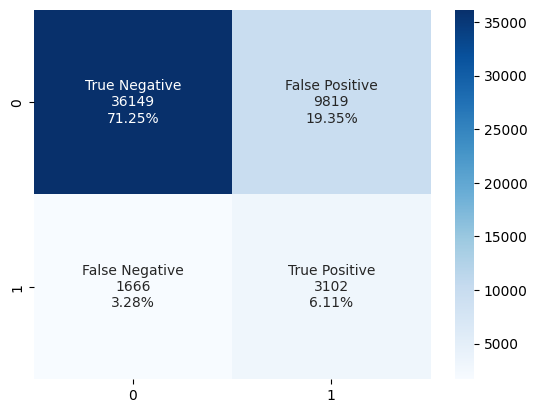

In [82]:
y_S_pred = clf.predict(X_test)
evaluate_model(clf, X_S, y_S)
draw_confusion_matrix(y_test, y_S_pred)

##### Random

Model: DecisionTreeClassifier
Accuracy: 0.7128863134657837
Precision: 0.21895256123444043
Recall: 0.8005453020134228
F1 Score: 0.34385838475744335
AUC-ROC: 0.7521696228131854


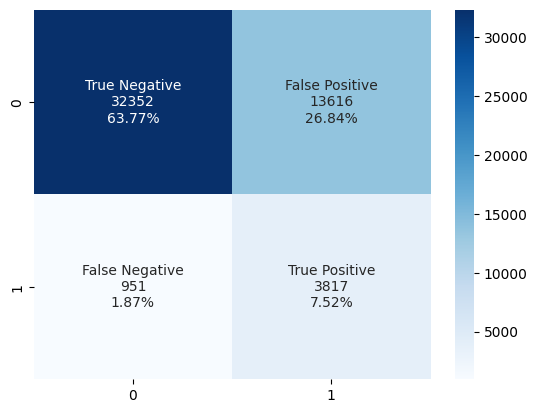

In [87]:
clf.fit(X_ro, y_ro)
y_ro_pred = clf.predict(X_test)
evaluate_model(clf, X_ro, y_ro)
draw_confusion_matrix(y_test, y_ro_pred)

#### Undersampled

##### Random

Model: DecisionTreeClassifier
Accuracy: 0.7113489435509303
Precision: 0.21742862047262115
Recall: 0.7969798657718121
F1 Score: 0.3416498089458305
AUC-ROC: 0.7497233996453909


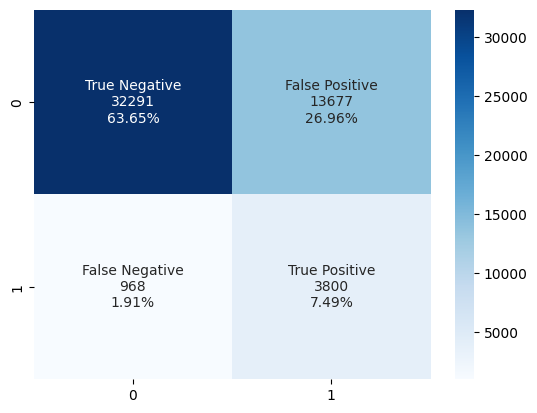

In [86]:
clf.fit(X_ru, y_ru)
y_ru_pred = clf.predict(X_test)
evaluate_model(clf, X_ru, y_ru)
draw_confusion_matrix(y_test, y_ru_pred)

##### TomekLinks

Model: DecisionTreeClassifier
Accuracy: 0.9077578051087984
Precision: 0.5785714285714286
Recall: 0.06795302013422819
F1 Score: 0.12162162162162163
AUC-ROC: 0.5314095069345002


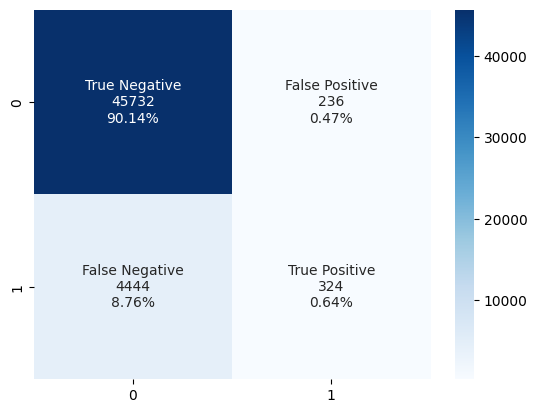

In [85]:
clf.fit(X_T, y_T)
y_tl_pred = clf.predict(X_test)
evaluate_model(clf, X_T, y_T)
draw_confusion_matrix(y_test, y_tl_pred)

#### Undersampled and Oversampled - TomekLinks and SMOTE

Model: DecisionTreeClassifier
Accuracy: 0.7704391359192684
Precision: 0.2398063393600121
Recall: 0.6648489932885906
F1 Score: 0.35247678879190525
AUC-ROC: 0.7231201980017614


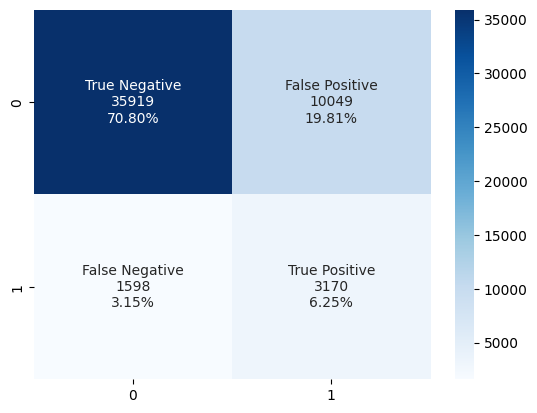

In [88]:
clf.fit(X_ST, y_ST)
y_st_pred = clf.predict(X_test)
evaluate_model(clf, X_ST, y_ST)
draw_confusion_matrix(y_test, y_st_pred)

### K-NN

In [99]:
clf2 = KNeighborsClassifier()
scaler = StandardScaler()

#### Oversampled

##### SMOTE

Model: KNeighborsClassifier
Accuracy: 0.8183538315988647
Precision: 0.23994387277829748
Recall: 0.4303691275167785
F1 Score: 0.3081081081081081
AUC-ROC: 0.6444832062923259


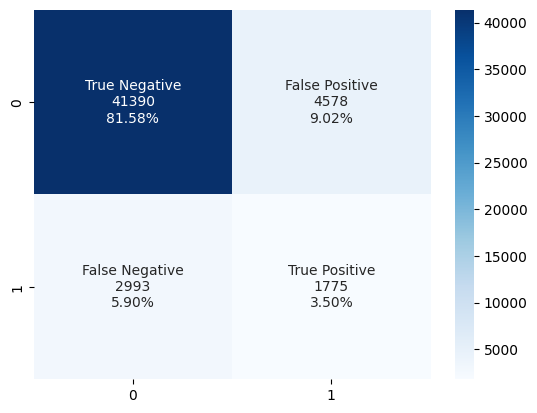

In [100]:
scaler.fit(X_S)
X_train_std = scaler.transform(X_S)

clf2.fit(X_train_std, y_S)

X_test_std = scaler.transform(X_test)

y_S_pred_2 = clf2.predict(X_test_std)

evaluate_model(clf2, X_S, y_S)
draw_confusion_matrix(y_test, y_S_pred_2)


##### Random

Model: KNeighborsClassifier
Accuracy: 0.855546357615894
Precision: 0.27364327382004594
Recall: 0.32466442953020136
F1 Score: 0.29697841726618707
AUC-ROC: 0.6176380797146308


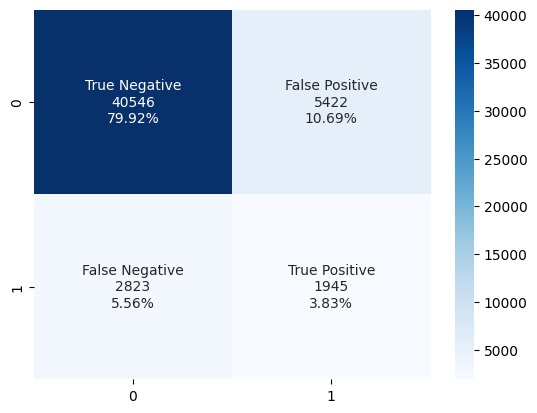

In [101]:
scaler.fit(X_ro)
X_train_std2 = scaler.transform(X_ro)

clf2.fit(X_train_std2, y_ro)

X_test_std2 = scaler.transform(X_test)

y_ro_pred_2 = clf2.predict(X_test_std2)

evaluate_model(clf2, X_ro, y_ro)
draw_confusion_matrix(y_test, y_ro_pred_2)


#### Undersampled

##### Random

Model: KNeighborsClassifier
Accuracy: 0.7835461999369284
Precision: 0.23187780462547464
Recall: 0.5635486577181208
F1 Score: 0.3285644411836635
AUC-ROC: 0.684956977658225


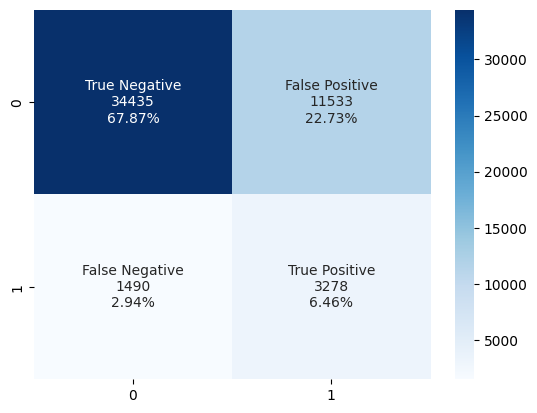

In [102]:
scaler.fit(X_ru)
X_train_std3 = scaler.transform(X_ru)

clf2.fit(X_train_std3, y_ru)

X_test_std3 = scaler.transform(X_test)

y_ru_pred_3 = clf2.predict(X_test_std3)

evaluate_model(clf2, X_ru, y_ru)
draw_confusion_matrix(y_test, y_ru_pred_3)

In [ ]:
scaler.fit(X_T)
X_train_std_tl = scaler.transform(X_T)
clf2.fit(X_train_std_tl, y_T)
X_test_std_tl = scaler.transform(X_test)
y_tl_pred = clf2.predict(X_test_std_tl)
evaluate_model(clf2, X_T, y_T)
draw_confusion_matrix(y_test, y_tl_pred)

NameError: name 'X_tl' is not defined

##### Tomekslink